In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './dataset/shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './dataset/shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

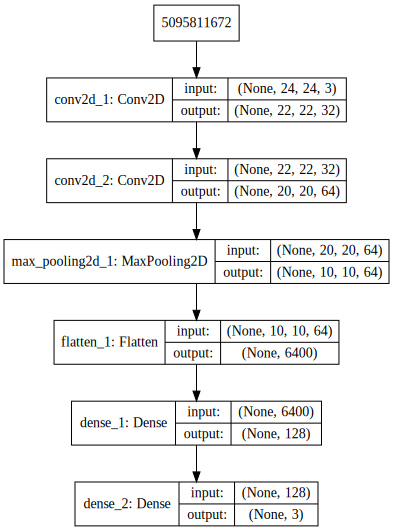

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 1s 68ms/step - loss: 1.2719 - acc: 0.3778 - val_loss: 1.0216 - val_acc: 0.6000
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.4923 - acc: 0.9778 - val_loss: 0.7183 - val_acc: 0.6667
Epoch 3/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0203 - acc: 1.0000 - val_loss: 0.7920 - val_acc: 0.6000
Epoch 4/50
15/15 [==============================] - 0s 28ms/step - loss: 8.3562e-04 - acc: 1.0000 - val_loss: 0.8316 - val_acc: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 26ms/step - loss: 2.1227e-04 - acc: 1.0000 - val_loss: 0.7378 - val_acc: 0.6667
Epoch 6/50
15/15 [==============================] - 0s 31ms/step - loss: 1.2466e-04 - acc: 1.0000 - val_loss: 0.7174 - val_acc: 0.6667
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 9.8698e-05 - acc: 1.0000 - val_loss: 0.7111 - val_acc: 0.6667
Epoch 8/50
15/15 [==============================] - 0s 29ms/step - 

In [7]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 86.67%


In [8]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.009 0.991 0.000]
 [0.979 0.017 0.005]
 [0.535 0.465 0.000]
 [0.038 0.962 0.000]
 [0.043 0.251 0.706]
 [0.964 0.035 0.000]
 [0.043 0.251 0.706]
 [0.000 0.795 0.204]
 [0.979 0.017 0.005]
 [0.535 0.465 0.000]
 [0.038 0.962 0.000]
 [0.642 0.357 0.001]
 [0.964 0.035 0.000]
 [0.023 0.976 0.000]
 [0.104 0.061 0.835]]
